<a href="https://colab.research.google.com/github/rajdas2001/Sentiment-Analysis-of-Movie-Reviews/blob/main/Sentiment_Analysis_of_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the Dependencies

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00


In [2]:
!pip3 install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 767.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49721 sha256=7deb85ca3c72e07b30f2e69bab17f0ed2eec0adaa0d72042b1559ee87f84f943
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


# Exploring the Dataset and reading the first 2000 datapoints

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("movie.csv")

df = df.iloc[:2000]

df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Preliminary Analysis

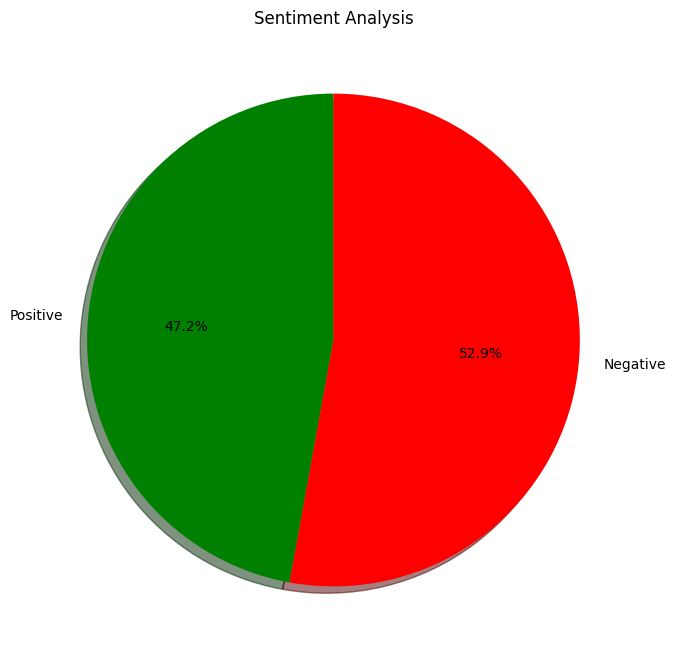

In [4]:
original_negative = 0
original_positive = 0

for elements in df.label:
  if elements == 0:
    original_negative = original_negative + 1
  else:
    original_positive = original_positive + 1


colors = ['green', 'red']
sizes = [original_positive,original_negative]
labels = 'Positive', 'Negative'

plt.figure(figsize=(15,8))
plt.pie(
    x=sizes,
    autopct='%1.1f%%',
    colors=colors,
    labels=labels,
    startangle=90,
    shadow=True,

)

plt.title("Sentiment Analysis")
plt.show()

# Shortening the reviews

HuggingFace Transformer can only analyze fixed number of tokens (512). So, for effective Sentiment Analysis, the text length has been reduced to 400.

In [5]:
reviews = df.text.tolist()

shortended_reviews = []
for elements in reviews:
  val = elements[:400]
  shortended_reviews.append(val)

df['final_reviews'] = shortended_reviews
df

,text,label,final_reviews
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa..."
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...
...,...,...,...
1995,"This is one of the most insipid, lackluster, u...",0,"This is one of the most insipid, lackluster, u..."
1996,"Again, we're getting a melange of themes well ...",0,"Again, we're getting a melange of themes well ..."
1997,"When I first saw this movie, I thought it was ...",1,"When I first saw this movie, I thought it was ..."
1998,Well our standards have gone into the toilet. ...,0,Well our standards have gone into the toilet. ...


# Using Transformer for Sentiment Analysis

Model Used: https://huggingface.co/siebert/sentiment-roberta-large-english

In [6]:
from transformers import pipeline
model = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
final_reviews_list = df.final_reviews.tolist()
sentiments = []

for elements in final_reviews_list:
  res = model(elements)
  sentiments.append(res[0]['label'])

df['Sentiments'] = sentiments
df

,text,label,final_reviews,Sentiments
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,NEGATIVE
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...",NEGATIVE
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,NEGATIVE
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,NEGATIVE
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,POSITIVE
...,...,...,...,...
1995,"This is one of the most insipid, lackluster, u...",0,"This is one of the most insipid, lackluster, u...",NEGATIVE
1996,"Again, we're getting a melange of themes well ...",0,"Again, we're getting a melange of themes well ...",NEGATIVE
1997,"When I first saw this movie, I thought it was ...",1,"When I first saw this movie, I thought it was ...",POSITIVE
1998,Well our standards have gone into the toilet. ...,0,Well our standards have gone into the toilet. ...,NEGATIVE


In [7]:
df['Predictions']=df['Sentiments'].apply(lambda x: 1 if x == "POSITIVE" else 0)
df

,text,label,final_reviews,Sentiments,Predictions
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up (b. 1965) watching and loving the Th...,NEGATIVE,0
1,"When I put this movie in my DVD player, and sa...",0,"When I put this movie in my DVD player, and sa...",NEGATIVE,0
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...,NEGATIVE,0
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...,NEGATIVE,0
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...,POSITIVE,1
...,...,...,...,...,...
1995,"This is one of the most insipid, lackluster, u...",0,"This is one of the most insipid, lackluster, u...",NEGATIVE,0
1996,"Again, we're getting a melange of themes well ...",0,"Again, we're getting a melange of themes well ...",NEGATIVE,0
1997,"When I first saw this movie, I thought it was ...",1,"When I first saw this movie, I thought it was ...",POSITIVE,1
1998,Well our standards have gone into the toilet. ...,0,Well our standards have gone into the toilet. ...,NEGATIVE,0


# Plotting Results

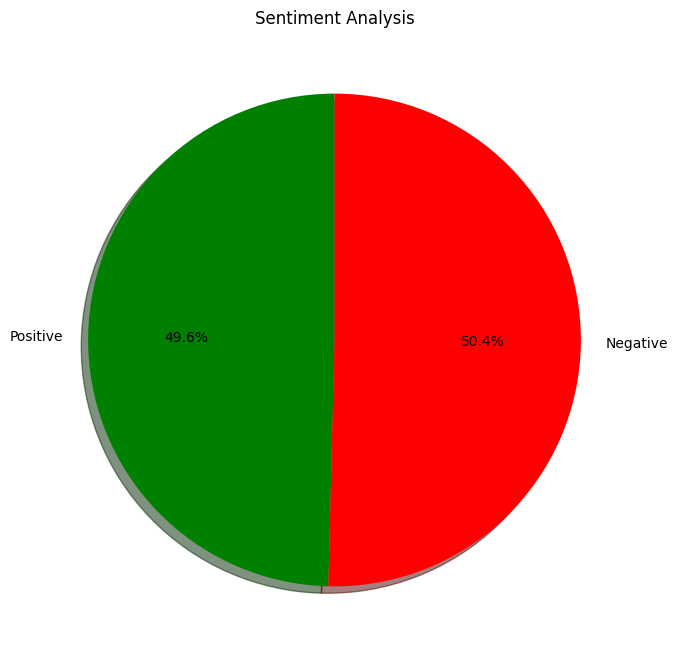

In [8]:
new_negative = 0
new_positive = 0

for elements in df.Predictions:
  if elements == 0:
    new_negative = new_negative + 1
  else:
    new_positive = new_positive + 1


colors = ['green', 'red']
sizes = [new_positive,new_negative]
labels = 'Positive', 'Negative'

plt.figure(figsize=(15,8))
plt.pie(
    x=sizes,
    autopct='%1.1f%%',
    colors=colors,
    labels=labels,
    startangle=90,
    shadow=True,

)

plt.title("Sentiment Analysis")
plt.show()

# Accuracy Score

In [9]:
from sklearn.metrics import accuracy_score
a = accuracy_score(df.label,df.Predictions)
print(a)

0.8815
